<a href="https://colab.research.google.com/github/AlShimaHaroun/Breast-Cancer-Prediction/blob/main/Breast%20Cancer%20Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
cancer=pd.read_csv("/content/cancer.csv")

In [ ]:
cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
cancer.drop('id',axis=1, inplace=True)
cancer.drop("Unnamed: 32", axis=1, inplace=True)

In [ ]:
cancer.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
print(cancer.duplicated().sum())

0


In [ ]:
cancer.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
cancer['diagnosis']=cancer['diagnosis'].map({'M': 1, 'B' : 0})

In [ ]:
cancer.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
 X = cancer.drop('diagnosis', axis=1)
 Y = cancer['diagnosis']
 X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.25, random_state=0)

**# creating the random forest classifier**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)

**# Training the classifier**

In [ ]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

**Evaluate the model**

In [ ]:
Y_pred =rf_model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
precision= precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1= f1_score(Y_test, Y_pred)
# print metrics
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score", f1_score)

Accuracy: 0.965034965034965
Precision: 0.9444444444444444
Recall: 0.9622641509433962
F1 Score <function f1_score at 0x7bde5a13b5b0>


In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues,
                xticklabels=['Malignant', 'Benign'],
                yticklabels=['Malignant', 'Benign'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

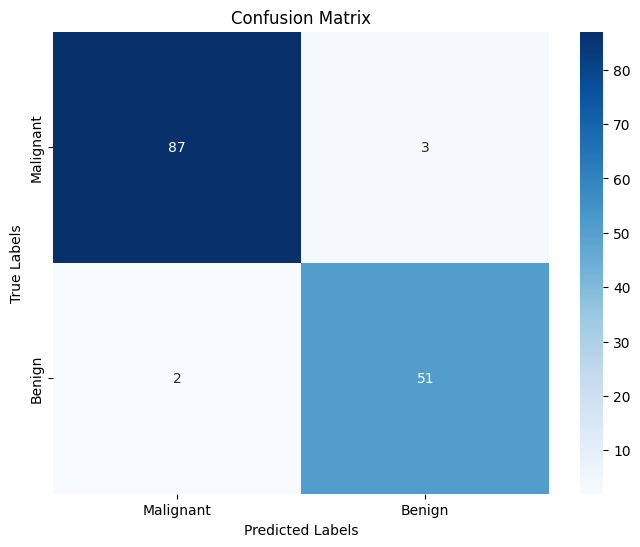

In [ ]:
plot_confusion_matrix(Y_test, Y_pred)

**# list of hyperparameters**

In [ ]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

**# Creating GridSearchCV object**

In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

**# Training the model using the Grid Search**

In [ ]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

**# Get the best Paramters**

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


**# Modeling using hyperparameter**

In [ ]:
rf_model2 = RandomForestClassifier(max_depth =None, min_samples_leaf = 4, min_samples_split =2, n_estimators = 100)

**# Training the model**

In [ ]:
rf_model2.fit(X_train, Y_train)

RandomForestClassifier(min_samples_leaf=4)

**# Evaluating the model**

In [ ]:
Y_pred2 =rf_model2.predict(X_test)
acc = accuracy_score(Y_test, Y_pred2)
precision= precision_score(Y_test, Y_pred2)
recall = recall_score(Y_test, Y_pred2)
f1= f1_score(Y_test, Y_pred2)
# print metrics
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score", f1)

Accuracy: 0.972027972027972
Precision: 0.9454545454545454
Recall: 0.9811320754716981
F1 Score 0.9629629629629629


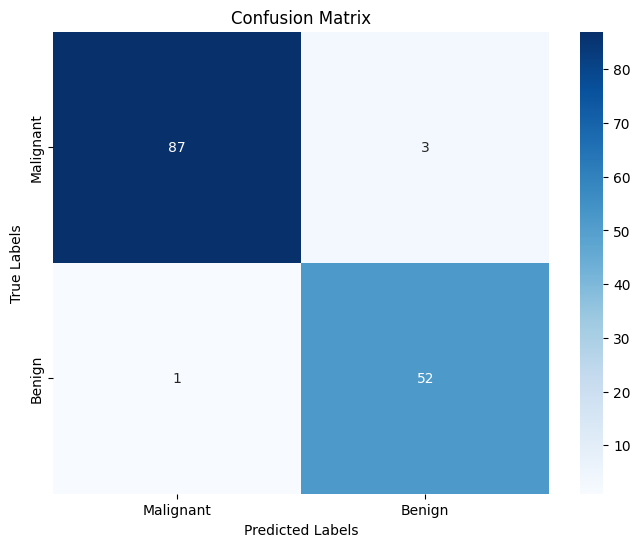

In [ ]:
plot_confusion_matrix(Y_test, Y_pred2)

In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.6 MB/s eta 0:00:00


In [ ]:
print(X_test.head(0))
Features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
len(Features)

Empty DataFrame
Columns: [radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 30 columns]


30

In [ ]:
import random
from deap import base, creator, tools, algorithms

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Define the fitness function
def evaluate(individual):
    # Create a mask from the individual
    mask = np.array(individual, dtype=bool)
    selected_features = [feature for feature, select in zip(Features, mask) if select]

    # Select the features from the training and test set
    x_train_selected = X_train.loc[:, mask]
    x_test_selected = X_test.loc[:, mask]

    # Train a classifier
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(x_train_selected, Y_train)

    # Evaluate the classifier
    y_pred = clf.predict(x_test_selected)
    return accuracy_score(Y_test, y_pred),

# Define the genetic algorithm parameters
n_gen = 10  # Number of generations
pop_size = 10  # Population size
n_features = len(Features)  # Number of features
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population and run the genetic algorithm
pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=n_gen, stats=stats, halloffame=hof, verbose=True)

# Get the best individual
best_individual = hof[0]
best_features = [feature for feature, select in zip(Features, best_individual) if select]

print("Best individual:", best_individual)
print("Best features:", best_features)


gen	nevals	avg     	min     	max     
0  	10    	0.955944	0.937063	0.979021
1  	6     	0.960839	0.93007 	0.979021
2  	2     	0.970629	0.958042	0.979021
3  	6     	0.966434	0.944056	0.979021
4  	8     	0.973427	0.965035	0.979021
5  	6     	0.972727	0.958042	0.979021
6  	7     	0.972028	0.958042	0.979021
7  	5     	0.974126	0.965035	0.979021
8  	6     	0.974126	0.965035	0.979021
9  	7     	0.972028	0.958042	0.986014
10 	6     	0.973427	0.958042	0.986014
Best individual: [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0]
Best features: ['texture_mean', 'perimeter_mean', 'smoothness_mean', 'concave points_mean', 'fractal_dimension_mean', 'perimeter_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


In [ ]:
opt_x_train = X_train[best_features]
opt_x_test = X_test[best_features]

In [ ]:
optimizedModel = RandomForestClassifier(n_estimators=100)
optimizedModel.fit(opt_x_train, Y_train)

RandomForestClassifier()

In [ ]:
OptPredicitions = optimizedModel.predict(opt_x_test)
acc = accuracy_score(Y_test,OptPredicitions)
precision = precision_score(Y_test,OptPredicitions)
recall = recall_score(Y_test,OptPredicitions)
f1 = f1_score(Y_test,OptPredicitions)
#metrics
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score", f1)

Accuracy: 0.972027972027972
Precision: 0.9622641509433962
Recall: 0.9622641509433962
F1 Score 0.9622641509433962


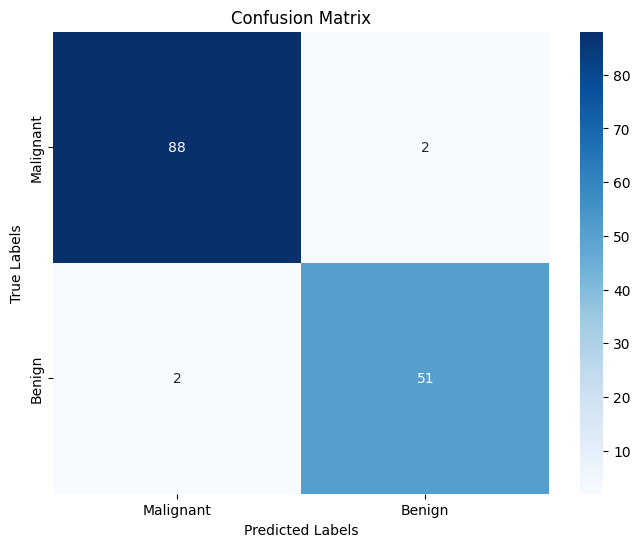

In [ ]:
plot_confusion_matrix(Y_test, OptPredicitions)